# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [1]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# stats
from scipy import stats

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, KFold

# displaying markdown strings
from IPython.display import display, Markdown, Latex

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

* 1) Let's load the data using `pandas`:

In [2]:
DATA_PATH = './data/'
REVIEW_DATASET = DATA_PATH + 'pitchfork.csv.gz'
COMPRESSION = 'gzip'

In [3]:
music_review = pd.read_csv(REVIEW_DATASET, sep = ',', compression = COMPRESSION, dtype = {'releaseyear': int})
music_review['reviewdate'] = pd.to_datetime(music_review['reviewdate'])
music_review.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009,2009-02-18,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005,2005-02-13,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004,2004-08-19,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003,2003-07-17,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


* The data types of the dataframe columns are:

In [4]:
music_review.dtypes

artist                      object
album                       object
reviewauthor                object
score                      float64
releaseyear                  int64
reviewdate          datetime64[ns]
recordlabel                 object
genre                       object
danceability               float64
energy                     float64
key                        float64
loudness                   float64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
dtype: object

* Let's check if there are duplicated reviews, i.e., two reviews with albums by the same band with the same name, using `pandas.DataFrame.duplicated` with the parameter "keep" set as 'False' to count all duplicate entries in the dataframe:

In [5]:
print(f'The original dataframe (with duplicated reviews) contains {music_review.shape[0]} rows.')

duplicated_mask = music_review.duplicated(subset = ['artist', 'album'], keep = False)
print(f'There are {np.sum(duplicated_mask)} duplicates at all in the music review dataset.\n')

music_review[duplicated_mask].head()

The original dataframe (with duplicated reviews) contains 16785 rows.
There are 93 duplicates at all in the music review dataset.



,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
10,American Football,American Football,Ian Cohen,8.6,1999,2014-05-21,Polyvinyl,Rock,0.482778,0.681889,5.222222,-9.121778,0.031889,0.272561,0.361657,0.141989,0.282889,123.864000
11,American Football,American Football,Ian Cohen,7.7,2016,2016-10-26,Polyvinyl,Rock,0.482778,0.681889,5.222222,-9.121778,0.031889,0.272561,0.361657,0.141989,0.282889,123.864000
91,Crystal Castles,Crystal Castles,Ian Cohen,7.8,2008,2008-03-17,Last Gang,Electronic,0.630529,0.730353,4.294118,-7.089176,0.052694,0.116483,0.258783,0.200553,0.569471,123.956529
92,Crystal Castles,Crystal Castles,Ian Cohen,8.5,2010,2010-04-29,Fiction,Electronic,0.630529,0.730353,4.294118,-7.089176,0.052694,0.116483,0.258783,0.200553,0.569471,123.956529
293,Ty Segall,Ty Segall,Stuart Berman,8.0,2017,2017-01-25,Drag City,Rock,0.300100,0.560550,4.300000,-10.878100,0.044340,0.142807,0.051030,0.136800,0.423400,120.459300


* The dataset contains duplicate reviews, therefore we filter these rows using `pandas.DataFrame.drop_duplicates` with the parameter "keep" set as 'first' to remove the duplicates except for the first occurance.

In [6]:
music_review = music_review.drop_duplicates(subset = ['artist', 'album'], keep = 'first')
print(f'The dataframe without duplicated reviews contains {music_review.shape[0]} rows.')

The dataframe without duplicated reviews contains 16738 rows.


* 2) For the following plots we define a 'colorblind' palette:

In [7]:
clr_palette = sns.color_palette('colorblind', 10)

* Here we plot the distribution of album release years:

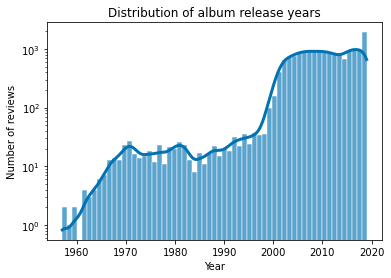

In [8]:
sns.histplot(music_review['releaseyear'], bins = len(set(music_review['releaseyear'])), color = clr_palette[0],
             edgecolor = 'white', kde = True, alpha = 0.65, line_kws = {'linewidth': 3})
plt.title('Distribution of album release years')
plt.ylabel('Number of reviews')
plt.xlabel('Year')
plt.yscale('log')
plt.show()

* Let's plot the distribution of the average score of albums per year:

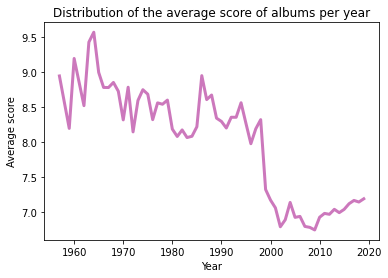

In [9]:
avg_score = music_review.groupby(by = 'releaseyear')['score'].mean()
plt.plot(avg_score.index, avg_score.values, linewidth = 3, color = clr_palette[4])
plt.title('Distribution of the average score of albums per year')
plt.ylabel('Average score')
plt.xlabel('Year')
plt.show()

* 3) Let's define which columns are numerical and which are categorical. In order to define numerical data we use `pd.api.types.is_numeric_dtype`, in order to define categorical data we assume that not numerical and not date format columns is categorical:

In [10]:
numerical_columns = []
categorical_columns = []
for column in music_review.columns:
    if pd.api.types.is_numeric_dtype(music_review[column]):
        numerical_columns.append(column)
    elif not pd.api.types.is_datetime64_dtype(music_review[column]):
        categorical_columns.append(column)

* Here we calculate the mean, median, minimum value and maximum value for numerical columns:

In [11]:
df_stat = music_review[numerical_columns].agg(func = ['mean', 'median', 'min', 'max'])
df_stat

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048596,2009.346338,0.512334,0.601276,5.216501,-9.283268,0.090742,0.301914,0.274748,0.196402,0.405268,120.326487
median,7.300000,2010.000000,0.511348,0.624722,5.230769,-8.444263,0.056665,0.228844,0.149363,0.174261,0.406288,120.397346
min,0.000000,1957.000000,-1.000000,-1.000000,-1.000000,-51.728750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


* Let's plot the distribution for all the numerical columns:

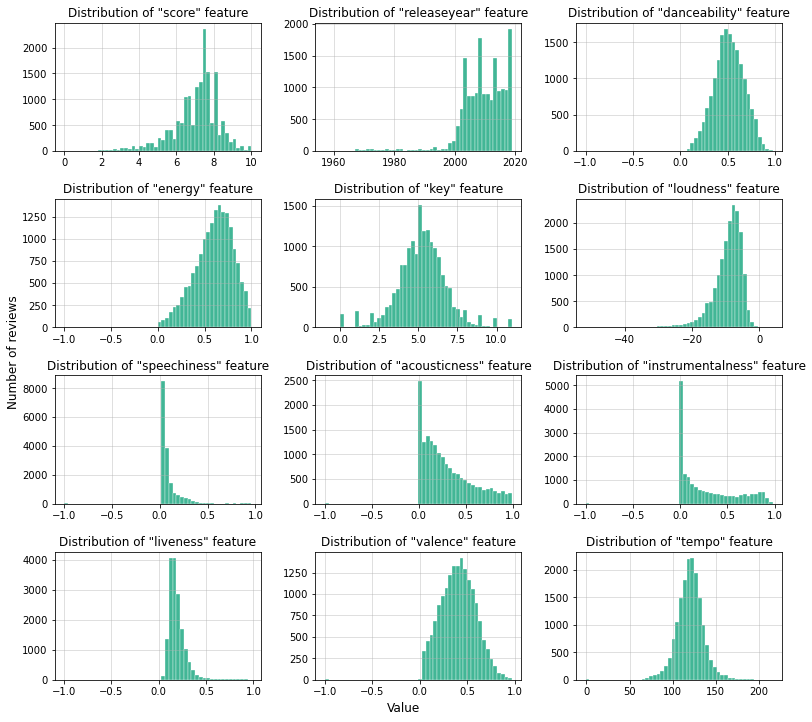

In [12]:
fig, ax = plt.subplots(4, 3, figsize = (11, 10))

count = 0
for i in range(4):
    for j in range(3):
        column = numerical_columns[count]
        hist = sns.histplot(music_review[column], bins = 50, color = clr_palette[2],
                            ax = ax[i, j], edgecolor = 'white')
        hist.set(xlabel = None, ylabel = None)
        ax[i, j].grid(alpha = 0.5)
        ax[i, j].set_title(f'Distribution of "{column}" feature')
        count += 1

fig.tight_layout(pad = 1.5)
fig.text(0.5, 0, 'Value', ha = 'center', size = 'large')
fig.text(0, 0.5, 'Number of reviews', va = 'center', size = 'large', rotation = 90)
plt.show()

* 4) For the genre column we assign the value 'Other' for albums where the value is either 'none' or NaN:

In [13]:
none_mask = (pd.isna(music_review['genre'])|(music_review['genre'].values == 'none'))
music_review.loc[none_mask, 'genre'] = 'Other'

* Here we list how many different values there are in each categorical column.<br>
For this we create a dataframe `df_unique` where **'Column'** corresponds to column name, **'Counts'** - the number of unique values in the column, **'Unique values'** - listed unique values.

In [14]:
df_unique = pd.DataFrame(columns = ['Column', 'Counts', 'Unique values'])
for column in categorical_columns:
    unique_val = music_review[column].unique()
    df_unique = df_unique.append({'Column': column, 'Counts': len(unique_val),
                                  'Unique values': unique_val}, ignore_index = True)
df_unique

,Column,Counts,Unique values
0,artist,7892,"[Studio 1, John Fahey, Reigning Sound, The Red..."
1,album,16183,"[Studio 1, The Great Santa Barbara Oil Slick, ..."
2,reviewauthor,554,"[Andy Battaglia, Mark Richardson, Stephen M. D..."
3,recordlabel,3032,"[Studio, Water, In the Red, Badman, Warner Bro..."
4,genre,10,"[Electronic, Folk/Country, Rock, Rap, Global, ..."


* Let's print the unique values of columns with less than (or equal) 10 distinct values:

In [15]:
dist_10 = df_unique[df_unique['Counts'] <= 10]
for i, row in dist_10.iterrows():
    if row['Counts'] <= 10:
        print(f"There are {row['Counts']} unique values in \"{row['Column']}\" column.")
        print("They are:")
        print(*row['Unique values'], sep = ', ')

There are 10 unique values in "genre" column.
They are:
Electronic, Folk/Country, Rock, Rap, Global, Experimental, Metal, Pop/R&B, Jazz, Other


* From the dataset statistics analysis and the columns description we can see, that some columns contain negative values whereas their values should start from 0.0, we will drop these rows:

In [16]:
scale_0_1 = ['acousticness', 'danceability', 'energy', 'instrumentalness',
             'liveness', 'speechiness', 'valence']

anomalous_rows = music_review.loc[np.sum(music_review[scale_0_1] < 0, axis = 1).astype(bool), :]
if anomalous_rows.empty:
    print('All music reviews have values that match the feature description.')
else:
    print('The music reviews that don\'t match the feature description:')
    display(anomalous_rows.head())

The music reviews that don't match the feature description:


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
607,Patrick Cleandenim,Baby Comes Home,Eric Harvey,6.9,2007,2007-08-14,Ba Da Bing!,Pop/R&B,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
722,Missy Elliott,Respect M.E.,Jess Harvell,9.2,2006,2006-09-20,Atlantic,Rap,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2236,Babe Rainbow,Falling Apart,Jonah Bromwich,6.5,2014,2014-07-09,Kinky Beggar,Electronic,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2980,Ashtar Lavanda,Unsolved Mysteries,Rachel Hahn,7.1,2018,2018-02-15,Ultramajic,Electronic,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6676,Unsane,Blood Run,Brandon Stosuy,5.0,2005,2005-08-07,Relapse,Rock,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


* The mean, median, minimum value and maximum value for numerical columns after we dropped inappropriate rows:

In [17]:
music_review = music_review.drop(anomalous_rows.index, axis = 0)
df_stat = music_review[numerical_columns].agg(func = ['mean', 'median', 'min', 'max'])
df_stat

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048536,2009.345965,0.512967,0.601951,5.219034,-9.286912,0.091208,0.302476,0.275303,0.196910,0.405853,120.377216
median,7.300000,2010.000000,0.511364,0.624823,5.230769,-8.446428,0.056681,0.229000,0.149641,0.174304,0.406300,120.406490
min,0.000000,1957.000000,0.038667,0.000126,0.000000,-51.728750,0.008644,0.000001,0.000000,0.015300,0.000010,23.983333
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


In music, sites like Pitchfork curate album reviews from expert music journalists, and those reviews are often held up as the gold standard in reviewing for music. P4KxSpotify dataset is a dataset of Pitchfork album reviews with the corresponding Spotify audio features for those albums. Its authors scraped Pitchfork, a review site that has been publishing reviews since the late-1990’s, and then used Spotify’s API to retrieve 10 audio features that describe each album. The Pitchfork descriptions are intuited from a standard review page; Spotify metrics are described in the API documentation. The features that come from scraping are: `artist`, `album`, `recordlabel`, `releaseyear`, `score`, `reviewauthor`, `genre`, `reviewdate`. The features from Spotify API: `key`, `acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `valence`, `tempo`.

* 5) **Discussion:**
According to the way the data was collected, we observe that the dataset includes the subjectivity of expert reviews with the objectivity yielded by computationally derived audio features that describe music, it means that subjective measures of quality (reviewer’s scores) are combined with with objective measures of the artefact being reviewed (computationally derived descriptors of the music). Based on this, the ways, in which this data may not be representative of music albums in general, are:

1. **Bias of "releaseyear" feature.** From the distribution of album release years and printed statistics of numerical columns we can see that most of the reviewed albums were released (pretty) recently, that is, having albums in a range from 1957 to 2019 year, we obtain the median of releaseyear feature equal to 2010. The reason for that phenomenon can be found in Pitchfork's Wikipedia page: "In late 1995, ... Schreiber, who had no previous writing experience, aimed to provide the Internet with a regularly updated resource for independent music ... the site was updated monthly with interviews and reviews. In May 1996, the site began publishing daily ... In early 1999, ...  the site had expanded to four full-length album reviews daily". The site was developping and providing more and more album reviews every year. Reviewers gave preference to the modern, recently released albums, that's why, we can see the significant increase of the number of reviews for albums released after 1995 in the plot "Distribution of album release years".

2. **"Score" bias.** "The average score of albums per year" plot has peaks and falls, but the overall trend is a decline. Also, there can be seen a huge difference between an average score for music before and after 2000 year. This behavior can be explained by the fact that Pitchfork is a journalistic review entity and reviewers there can belong to the age category when they admire the music of old years/their youth and are picky about the latest hits. Additionally, the bias in the score points can be noticed from the statistics of numerical columns, the feature median is equal to $7.3$, whereas mean $\approx 7.049$. All in all, Pitchfork has been subject to numerous accusations of bias in their reviews, so we can state that the presence of subjective metrics is the main dataset oddity that prevents the representativeness of the data for music albums. Here are some proves from the Wikipedia page: "The website had a reputation for publishing reviews early and for being unpredictable, often strongly dependent on which reviewer was writing. In a 2006 article in Slate, Matthew Shaer accused Pitchfork of deliberately writing provocative and contrarian reviews in order to attract attention".

3. **Bias of "genre" feature.** According to the Wikipedia page, Pitchfork "earned a reputation for its extensive coverage of indie rock music". Counting the number of reviews per genre, we get that genre "Rock" has $\approx 40\%$ out of all reviews and genre "Electronic" has $\approx 21.3\%$, whereas the total number of genres is $10$.

An additional factor of bias that is comprised in the dataset is mentioned in the paper Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." The paper states that there are 45 authors with more than $100$ reviews in the dataset; these authors’ reviews constitute $10720$ of the $18403$ reviews or $58.2\%$ of the total number of reviews. The fact that a great number of the reviews belong to a small subset of people reveals another subjective source of the data provided.

In [18]:
music_review['genre'].value_counts() / music_review['genre'].count()

Rock            0.400418
Electronic      0.212911
Experimental    0.097908
Rap             0.096175
Pop/R&B         0.076748
Metal           0.045069
Folk/Country    0.043873
Jazz            0.016617
Global          0.009623
Other           0.000658
Name: genre, dtype: float64

#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

* 1) For each possible value in the `genre` column we create a new column called `{genre}_onehot`. If for a given album the `genre` is filled with the value from the name of the column, this column should equal 1 and all other `{genre}_onehot` columns should equal 0. In the beginning, we use the function `pandas.get_dummies()` to convert the categorical variable `genre` into indicator variables.

In [19]:
music_review_oh = pd.get_dummies(music_review, columns = ['genre'])
music_review_oh.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,...,genre_Electronic,genre_Experimental,genre_Folk/Country,genre_Global,genre_Jazz,genre_Metal,genre_Other,genre_Pop/R&B,genre_Rap,genre_Rock
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009,2009-02-18,Studio,0.511917,0.499667,5.250000,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005,2005-02-13,Water,0.369765,0.325412,4.470588,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004,2004-08-19,In the Red,0.253943,0.912857,4.428571,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003,2003-07-17,Badman,0.425400,0.433474,5.700000,...,0,0,0,0,0,0,0,0,0,1
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,2018-08-03,Warner Bros.,0.624846,0.438154,4.153846,...,0,0,0,0,0,0,0,0,1,0


* Now we have new columns with names `genre_{genre}` for each value of the column `genre` that was "one hot-encoded" by these new columns. We rename these columns according to our task. To do so we select all columns that contain "genre" prefix in their name and rename them to `{genre}_onehot`.

In [20]:
oh_columns = [column for column in music_review_oh.columns if column.find('genre') != -1]
oh_columns_map = {column: column[column.find('_') + 1:] + '_onehot' for column in oh_columns}
music_review_oh = music_review_oh.rename(oh_columns_map, axis = 1)
music_review_oh.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009,2009-02-18,Studio,0.511917,0.499667,5.250000,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005,2005-02-13,Water,0.369765,0.325412,4.470588,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004,2004-08-19,In the Red,0.253943,0.912857,4.428571,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003,2003-07-17,Badman,0.425400,0.433474,5.700000,...,0,0,0,0,0,0,0,0,0,1
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,2018-08-03,Warner Bros.,0.624846,0.438154,4.153846,...,0,0,0,0,0,0,0,0,1,0


* 2) Below we create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of the `dataframe`. The function's input parameters are a dataframe `df` with N rows and a list `cols` of M columns. It returns a `np.array` of dimension (NxM). Inside this function we use the function `pandas.DataFrame.to_numpy()` to convert the DataFrame to a NumPy array.

In [21]:
def numpy_helper(df, cols):
    '''
    Obtaining numpy.ndarray out of the dataframe.
    
    :param df: pandas.DataFrame, input dataframe with N rows;
    :param cols: list, list of column names (length M);
    
    :return: numpy.ndarray, dataframe converted into a NumPy array of dimension NxM.
    '''
    numpy_array = df[cols].to_numpy()
    return numpy_array

* 3) Firstly, we select from a list of columns all columns containing the suffix `onehot`. Secondly, we build an array of features `X` containing all genre-related one-hot features using the function `numpy_helper()` created for the previous task. Then with the same function we build an array of outcomes `y` containing `score` values.

In [22]:
onehot_columns = [column for column in music_review_oh.columns if column.find('onehot') != -1]
X = numpy_helper(music_review_oh, onehot_columns)

y = numpy_helper(music_review_oh, 'score')

* Finally, using the function `sklearn.model_selection.train_test_split()` with `random_state=123`, we split the data into a train set containing 70% of all data, and a test set containing the remaining 30%. We use the parameter `train_size` to set sizes for the train set and the test set.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

* 4) Our baseline regressor consists of two functions: `regressor(y_train)` and `classifier(X_test, av_score)`. In the training stage `regressor(y_train)` estimates with the function `numpy.mean()` and returns the average score `av_score` for all albums using the training data outputs `y_train`. Then, in the prediction stage, `classifier(X_test, av_score)` always outputs the average score `av_score` (previously computed by `regressor(y_train)` on the training data) for the test data `X_test`.

In [24]:
def regressor(y_train):
    '''
    Baseline regressor. Using the training data, estimates
    the average score for all albums.
    
    :param y_train: numpy.ndarray, array of album scores for training stage;
    
    :return: numpy.float64, average score for all albums.
    '''
    av_score = y_train.mean()
    return av_score

def classifier(X_test, av_score):
    '''
    Classifier. For the test data (in the prediction stage), provides
    as an output the average album score computed on the training data.
    
    :param X_test: numpy.ndarray, test data as an array of album features;
    :param av_score: numpy.float64, the average album score computed on the training data;
    
    :return: numpy.ndarray, array of the average album score computed on the training data.
    '''
    y_predicted = np.zeros(X_test.shape[0])
    y_predicted.fill(av_score)
    return y_predicted

av_score = regressor(y_train)
y_predicted = classifier(X_test, av_score)

* 5) Here we calculate and print the coefficient of determination ($R^2$) of our baseline regressor on the test data. For that purpose we use the function `sklearn.metrics.r2_score()`.

In [25]:
print('R-squared coefficient of determination:', r2_score(y_test, y_predicted))

R-squared coefficient of determination: -1.0839329994682956e-05


* 6) **Discussion:** 
We randomly choose the reviews of the albums that were released in different years between 1957 and 2019.  For the random split we always make predictions for the test set that consists of albums from this wide range of release years, some of them can be very old. Predictions can be significantly different for the future albums. If we want to know how good our model is predicting whether a future album will be successful or not, it is better to use the longitudinal split and set the most recent albums as the test set, while all others - as the train set. In that situation we will be able to evaluate the results of predicting scores for the newest albums. If we assume that we don't know scores for these albums, it already becomes a problem of predicting scores for the future albums.
Moreover, we have a dataset in which some of the music genres are presented more often than others (for example, "Rock" and "Electronic", see proves and explanations in Task 1.5). It is possible that the training set, randomly selected from the dataset, will not include albums of the least encountered genres (such as "Jazz" and "Global"). Or it will include them, but not enough comparing to other genres. In that situation the model will make wrong predictions for the future albums of these least popular genres.

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

* 1) Let's build a Linear Regression model.<br>
Firstly, we define the feature matrix and the class vector (X and y), then randomly split them into training and test sets:

In [26]:
feature_cols = numerical_columns[1:] + list(oh_columns_map.values())
X = music_review_oh[feature_cols]
y = music_review_oh['score']

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size = 0.3, random_state = 123)

* Secondly, we train the model:

In [27]:
lr_rand = LinearRegression()
lr_rand.fit(X_train_rand, y_train_rand)

LinearRegression()

* Let's obtain prediction for the testing set and report the $R^2$:

In [28]:
pred_lr_rand = lr_rand.predict(X_test_rand)
r2_lr_rand = r2_score(y_test_rand, pred_lr_rand)
print(f'R-squared for linear regression (random split) is equal to {r2_lr_rand}.')

R-squared for linear regression (random split) is equal to 0.038669870192804434.


* 2) Here we obtain "the longitudinal split":

In [29]:
train_mask = X['releaseyear'] < 2000
test_mask = X['releaseyear'] >= 2003

X_train_long = X[train_mask]
y_train_long = music_review_oh.loc[train_mask, 'score']

X_test_long = X[test_mask]
y_test_long = music_review_oh.loc[test_mask, 'score']

* Let's train a Linear Regression model using the longitudinal split:

In [30]:
lr_long = LinearRegression()
lr_long.fit(X_train_long, y_train_long)

LinearRegression()

* Then obtain prediction for the testing set (from the longitudinal split) and report the $R^2$:

In [31]:
pred_lr_long = lr_long.predict(X_test_long)
r2_lr_long = r2_score(y_test_long, pred_lr_long)
print(f'R-squared for linear regression (longitudinal split) is equal to {r2_lr_long}.')

R-squared for linear regression (longitudinal split) is equal to -0.2822520426064128.


* **Discussion:**<br>
The coefficient of determination is defined as
$$R^2 = 1 - \frac{\hat{\sigma}^2}{s_y^2}$$
where $\hat{\sigma}^2$ - unexplained variance (variance of residuals), $s_y^2$  - variance of outcomes $y$.<br><br>
$R^2$ coefficient represents the fraction of variance explained by the model. In the best case, the modeled values exactly match the observed values, which results in $\hat{\sigma}^2 = 0$ and $R^2 = 1$. A baseline model, which always predicts $\bar {y}$ (the mean), will have $R^2 = 0$. Models that have worse predictions than this baseline will have a negative $R^2$.<br><br>
For the longitudinal split (training the linear regression with data from albums released before 2000 and testing with data from 2003 and after) we got a negative value for the $R^2$ coefficient ($R^2 \approx -0.282$). Analyzing the formula mentioned above, a negative value of the R-squared coefficient is obtained from $\hat{\sigma}^2 > s_y^2$, meaning that the unexplained variance is greater than the variance of outcomes. Interpreting this, the trained model does not follow the trend of the test data, therefore leading to a worse fit than the mean of the testing data provides. In other words, the predictions (being compared to the corresponding outcomes) have been derived from a model-fitting procedure that used the training data from another distribution than the testing data.<br><br>
All in all, the data before 2000 don't generalize well the data from 2003 and after, things seem to have changed between those years.

* 3) The distribution of residuals for the model trained in 3.2:

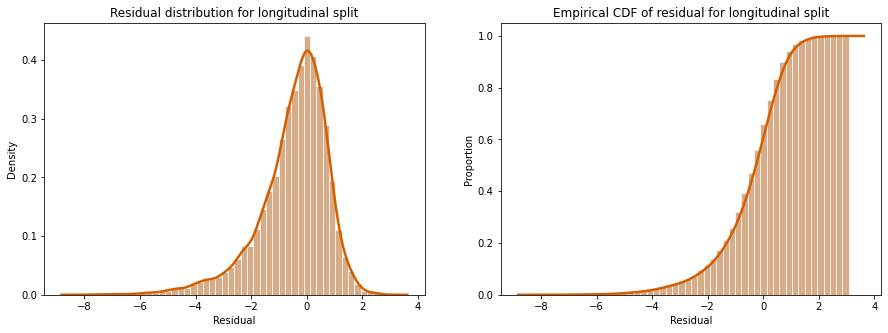

In [32]:
residual = y_test_long - pred_lr_long

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.histplot(residual, bins = 50, color = clr_palette[5], stat = 'density',
             ax = ax[0], edgecolor = 'white')
sns.kdeplot(residual, color = clr_palette[3], linewidth = 2.5, ax = ax[0])
ax[0].set(xlabel = 'Residual', ylabel = 'Density')
ax[0].set_title('Residual distribution for longitudinal split')

sns.histplot(residual, bins = 50, color = clr_palette[5], stat = 'density', cumulative = True,
             ax = ax[1], edgecolor = 'white')
sns.kdeplot(residual, color = clr_palette[3], linewidth = 2.5, cumulative = True, ax = ax[1])
ax[1].set(xlabel = 'Residual', ylabel = 'Proportion')
ax[1].set_title('Empirical CDF of residual for longitudinal split')

plt.show()

* Here we compute the probability that the score prediction from 3.2 is off by more than two score points:

In [33]:
prob_off = ((residual < -2).sum() + (residual > 2).sum()) / residual.count()
print(f'The probability of the score prediction to be off by more than 2 points is about {prob_off * 100:.3f}%.')

The probability of the score prediction to be off by more than 2 points is about 10.926%.


* Let's define `bootstrap_prob_CI` function in order to compute different bootstrapped confidence intervals:

In [34]:
def bootstrap_prob_CI(X_train, y_train, X_test, y_test, nbr_draws = 10000, conf_lvl = 95):
    '''
    Compute the bootstrapped confidence interval for the probability
    of the prediction to be off by more than 2 points.
    
    :param X_train: pandas.DataFrame, features used for the linear regression training;
    :param y_train: pandas.Series, target values used for the linear regression training;
    :param X_test: pandas.DataFrame, features used for the linear regression testing;
    :param y_test: pandas.Series, target values used for the computation of residuals;
    :param nbr_draws: int, the number of bootstrap samples;
    :param conf_lvl: int, the confidence level of CI.
    
    :return: list, bootstrapped confidence interval.
    '''
    lin_reg = LinearRegression()
    probs = np.array([])
    
    for i in range(nbr_draws):
        sample_ind = np.random.choice(range(X_train.shape[0]), size = X_train.shape[0], replace = True)
        X_train_resample = X_train.iloc[sample_ind, :] 
        y_train_resample = y_train.iloc[sample_ind]
        
        lin_reg.fit(X_train_resample, y_train_resample)
        predicted = lin_reg.predict(X_test)
        residual = y_test - predicted
        prob_off = ((residual < -2).sum() + (residual > 2).sum()) / residual.count()
        probs = np.append(prob_off, probs)
        
    ci = [np.nanpercentile(probs, (100 - conf_lvl) / 2), np.nanpercentile(probs, (100 + conf_lvl) / 2)]
    return ci

* Thus, different bootstrapped confidence intervals for the probability that score prediction from 3.2 is off by more than 2-points:

In [35]:
prob_ci90 = bootstrap_prob_CI(X_train_long, y_train_long, X_test_long, y_test_long, conf_lvl = 90)
print(f'The bootstrapped 90% CI for the probability is [{prob_ci90[0] * 100:.3f}%, {prob_ci90[1] * 100:.3f}%].')

The bootstrapped 90% CI for the probability is [9.828%, 13.002%].


In [36]:
prob_ci95 = bootstrap_prob_CI(X_train_long, y_train_long, X_test_long, y_test_long, conf_lvl = 95)
print(f'The bootstrapped 95% CI for the probability is [{prob_ci95[0] * 100:.3f}%, {prob_ci95[1] * 100:.3f}%].')

The bootstrapped 95% CI for the probability is [9.638%, 13.483%].


In [37]:
prob_ci99 = bootstrap_prob_CI(X_train_long, y_train_long, X_test_long, y_test_long, conf_lvl = 99)
print(f'The bootstrapped 99% CI for the probability is [{prob_ci99[0] * 100:.3f}%, {prob_ci99[1] * 100:.3f}%].')

The bootstrapped 99% CI for the probability is [9.292%, 14.372%].


* 4) Let's train a Gradient Boosting Regressor using the longitudinal split and the default hyperparameters:

In [38]:
gbr_long = GradientBoostingRegressor()
gbr_long.fit(X_train_long, y_train_long)

GradientBoostingRegressor()

* Then obtain prediction for the testing set (from the longitudinal split) and report the $R^2$:

In [39]:
pred_gbr_long = gbr_long.predict(X_test_long)
r2_gbr_long = r2_score(y_test_long, pred_gbr_long)
print(f'R-squared for Gradient Boosting Regressor (longitudinal split) is equal to {r2_gbr_long}.')

R-squared for Gradient Boosting Regressor (longitudinal split) is equal to -0.4049288927137764.


***
* 5) **Discussion:**<br>

Gradient boosting regression is a boosting ensemble method. The ensemble method represents an ensemble of weak predictive models that we train and then combine their results to make a better learner. The boosting is a type of ensemble methods which trains the model sequentially: at each step, we train a new learner that puts emphasis on the points that the previous learner got wrong.

The regressor based on boosted decision trees incorporates important advantages of tree-based methods, they have no need for prior data transformation or elimination of outliers, can fit complex nonlinear relationships, and automatically handle interaction effects between predictors.

In our case, we observe that:

Using the "random split" of the data we suppose that training and testing sets come from the same distribution, however, we observe that linear regression predicts poorly and provides $R^2$ coefficient close to zero, which means that we are doing slightly better than just fitting the mean to the data. Therefore, we can claim that there is no linear relationship between the used features and the score values; 

Using the "longitudinal split" we train our models with samples coming from one distribution (albums before 2000), but test with the samples taken from another distribution (albums from 2003 and after), therefore we get poor performance in both cases. From the statements above we conclude that a Gradient Boosting Regressor fits the training data better than a Linear Regression does, capturing nonlinear relationships between the features and the score values. Better fit to the data from one distribution produces higher unexplained variance for the data from different distribution, thus in the case of a Gradient Boosting Regressor we also observe a negative $R^2$ value and it is greater (by absolute value) than for a Linear Regression model. **Interpreting this, the trained Gradient Boosting Regressor model follows the trend that differs from the test data greater than the trend of a Linear Regression model.**

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

* 1) We create a new dataframe `music_review_band` as a copy of the provided dataset from the Task 1: `music_review`, so it contains the same columns. Then we select columns with the `onehot` features from the dataframe `music_review_oh` together with the columns `artist` and `album` and save them in the list of columns `onehot_columns`. Finally, we merge two dataframes with the function `pandas.DataFrame.merge()`. We use the left join on columns `artist` and `album` because the combination of these two values can be presented as a unique index since we have already removed all duplicates in the Task 1. We do not use the dataframe `music_review_oh` because it doesn't contain the column `genre` from the original dataset (it was converted into onehot-encoded columns in the Task 2. Now we have a dataframe with 28 columns: 18 columns from the original dataset and 10 onehot-features columns for `genre`).

In [40]:
music_review_band = music_review.copy()
onehot_columns = [column for column in music_review_oh.columns if column.find('onehot') != -1]
onehot_columns.append('artist')
onehot_columns.append('album')
music_review_band = music_review_band.merge(music_review_oh[onehot_columns], how = 'left', on = ['artist', 'album'])
music_review_band.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009,2009-02-18,Studio,Electronic,0.511917,0.499667,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005,2005-02-13,Water,Folk/Country,0.369765,0.325412,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004,2004-08-19,In the Red,Electronic,0.253943,0.912857,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003,2003-07-17,Badman,Rock,0.425400,0.433474,...,0,0,0,0,0,0,0,0,0,1
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,0,0,0,0,0,1,0


* Then we sort rows in the ascending order by the values of the columns `artist`, `releaseyear` and `reviewdate` with the function `pandas.DataFrame.sort_values()` to combine together albums of the same band and sort the according to the year. We use the `reviewdate` parameter to sort albums that were released during the same year because that is the only thing that can help us to find the latest album of the band. Usually the more recent album has the more recent review date (it is not always so, but we disregard these unique cases). Then we select with the function `pandas.DataFrame.duplicated()` all rows with bands that have more than one album and save them as a mask `several_albums`. According to the task, in our new dataframe should be left only these bands, because bands with one album do not have information about the previous albums. That is why, we save only bands from `several_albums`. Finally, we select rows with the previous albums for every artist with the function`pandas.DataFrame.duplicated()` with the parameters `subset = ['artist']` and `keep = 'last'` to save the most recent album of every band and save all the previous albums in `previous_albums_mask`.

In [41]:
music_review_band = music_review_band.sort_values(by = ['artist', 'releaseyear', 'reviewdate'])
several_albums = music_review_band.duplicated(subset = ['artist'], keep = False)
music_review_band = music_review_band[several_albums]
previous_albums_mask = music_review_band.duplicated(subset = ['artist'], keep = 'last')
music_review_band.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
7378,!!!,Split EP,Dominique Leone,6.0,1999,2004-02-12,GSL,Rock,0.470000,0.909500,...,0,0,0,0,0,0,0,0,0,1
6859,!!!,Louden Up Now,Nick Sylvester,7.0,2004,2004-06-07,Touch and Go,Rock,0.808273,0.751636,...,0,0,0,0,0,0,0,0,0,1
10477,!!!,Myth Takes,Brian Howe,8.0,2007,2007-03-02,Warp,Rock,0.646500,0.831800,...,0,0,0,0,0,0,0,0,0,1
10013,!!!,"Strange Weather, Isn't It?",Larry Fitzmaurice,6.9,2010,2010-08-20,Warp,Rock,0.711889,0.881778,...,0,0,0,0,0,0,0,0,0,1
2387,!!!,Thr!!!er,Brian Howe,6.0,2013,2013-04-30,Warp,Rock,0.778222,0.798444,...,0,0,0,0,0,0,0,0,0,1


* Now we remove all the previous albums with the function `pandas.DataFrame.drop_duplicates()` and get the dataframe `music_review_band_new` with one row for each band with several albums. 

In [42]:
music_review_band_new = music_review_band.drop_duplicates(subset = ['artist'], keep = 'last')
music_review_band_new.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
16431,!!!,Wallop,Jesse Dorris,7.2,2019,2019-09-07,none,Rock,0.745643,0.737857,...,0,0,0,0,0,0,0,0,0,1
16403,(Sandy) Alex G,House of Sugar,Anna Gaca,8.6,2019,2019-09-16,none,Rock,0.494308,0.639538,...,0,0,0,0,0,0,0,0,0,1
9568,...And You Will Know Us by the Trail of Dead,IX,Stuart Berman,7.2,2014,2014-10-21,Superball,Rock,0.415900,0.913800,...,0,0,0,0,0,0,0,0,0,1
16180,03 Greedo,Netflix & Deal,Sheldon Pearce,7.5,2019,2019-12-05,none,Rap,0.827077,0.543462,...,0,0,0,0,0,0,0,0,1,0
12901,13 & God,Own Your Ghost,Brian Howe,6.0,2011,2011-05-17,Anticon,Experimental,0.654000,0.763300,...,0,1,0,0,0,0,0,0,0,0


* We sort values according to the indices with `pandas.DataFrame.sort_index`.

In [43]:
music_review_band_new = music_review_band_new.sort_index()
music_review_band_new.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,0,0,0,0,0,1,0
5,French Kicks,Swimming,Roque Strew,7.6,2008,2008-08-27,Vagrant,Electronic,0.624846,0.438154,...,1,0,0,0,0,0,0,0,0,0
9,Wolf Parade,EP 4,Ian Cohen,7.0,2016,2016-05-26,Wolf Parade Productions,Rock,0.611000,0.624800,...,0,0,0,0,0,0,0,0,0,1
14,Throw Me the Statue,Creaturesque,Paul Thompson,6.1,2009,2009-08-11,Secretly Canadian,Rock,0.599500,0.683667,...,0,0,0,0,0,0,0,0,0,1
19,Aloe Blacc,Good Things,Nate Patrin,6.7,2010,2010-09-30,Stones Throw,Rap,0.541538,0.607846,...,0,0,0,0,0,0,0,0,1,0


* Now we group together rows with the previous albums by `artist` with the function `pandas.DataFrame.groupby()`. We calculate the average values for all of the band's previous albums for the features "score" "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related features with the function `pandas.core.groupby.GroupBy.mean()`. Save these values in the corresponding columns post-fixed with `_previous` with the function `pandas.DataFrame.add_suffix()`. To add these columns to our dataframe we use left join on the column `artist` with the function `pandas.DataFrame.merge()`. Finally, we delete the onehot-encoded columns because our new dataframe shouldn't contain them.

In [44]:
previous_albums_grouped = music_review_band[previous_albums_mask].groupby('artist')
previous_mean = previous_albums_grouped.mean().add_suffix('_previous')
music_review_band_new = music_review_band_new.merge(previous_mean, how = 'left', on = 'artist')
onehot = [column for column in music_review_oh.columns if column.find('onehot') != -1]
music_review_band_new = music_review_band_new.drop(columns = onehot)
music_review_band_new.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot_previous,Experimental_onehot_previous,Folk/Country_onehot_previous,Global_onehot_previous,Jazz_onehot_previous,Metal_onehot_previous,Other_onehot_previous,Pop/R&B_onehot_previous,Rap_onehot_previous,Rock_onehot_previous
0,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,French Kicks,Swimming,Roque Strew,7.6,2008,2008-08-27,Vagrant,Electronic,0.624846,0.438154,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wolf Parade,EP 4,Ian Cohen,7.0,2016,2016-05-26,Wolf Parade Productions,Rock,0.611000,0.624800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Throw Me the Statue,Creaturesque,Paul Thompson,6.1,2009,2009-08-11,Secretly Canadian,Rock,0.599500,0.683667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Aloe Blacc,Good Things,Nate Patrin,6.7,2010,2010-09-30,Stones Throw,Rap,0.541538,0.607846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


* We print the number of rows in the dataframe as well as the names of the columns. Finally, we have 40 columns.

In [45]:
print(f'The number of rows in the dataframe is {music_review_band_new.shape[0]}.\n')
print('The names of the columns in the dataframe are:\n', music_review_band_new.columns.tolist(), sep = '')

The number of rows in the dataframe is 3561.

The names of the columns in the dataframe are:
['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate', 'recordlabel', 'genre', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'score_previous', 'releaseyear_previous', 'danceability_previous', 'energy_previous', 'key_previous', 'loudness_previous', 'speechiness_previous', 'acousticness_previous', 'instrumentalness_previous', 'liveness_previous', 'valence_previous', 'tempo_previous', 'Electronic_onehot_previous', 'Experimental_onehot_previous', 'Folk/Country_onehot_previous', 'Global_onehot_previous', 'Jazz_onehot_previous', 'Metal_onehot_previous', 'Other_onehot_previous', 'Pop/R&B_onehot_previous', 'Rap_onehot_previous', 'Rock_onehot_previous']


* 2) We select all numerical features from the dataframe created for the Task 4.1.

In [46]:
gbr_features = numerical_columns[1:] + [column for column in music_review_band_new.columns if column.find('previous') != -1]
print('The features for a Gradient Boosting Regressor are:\n', gbr_features, sep = '')

The features for a Gradient Boosting Regressor are:
['releaseyear', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'score_previous', 'releaseyear_previous', 'danceability_previous', 'energy_previous', 'key_previous', 'loudness_previous', 'speechiness_previous', 'acousticness_previous', 'instrumentalness_previous', 'liveness_previous', 'valence_previous', 'tempo_previous', 'Electronic_onehot_previous', 'Experimental_onehot_previous', 'Folk/Country_onehot_previous', 'Global_onehot_previous', 'Jazz_onehot_previous', 'Metal_onehot_previous', 'Other_onehot_previous', 'Pop/R&B_onehot_previous', 'Rap_onehot_previous', 'Rock_onehot_previous']


* Now we use the function `numpy_helper()` created earlier to build an array of features `X` and an array of outcomes `y`. We use the function `sklearn.model_selection.train_test_split()` with the parameter `train_size` = 0.7 to do the 70/30 random train-test split.

In [47]:
X = numpy_helper(music_review_band_new, gbr_features)

y = numpy_helper(music_review_band_new, 'score')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

* We set and train a Gradient Boosting Regressor with the default hyperparameters (class `sklearn.ensemble.GradientBoostingRegressor`) with the method `fit()`, and report the $R^2$ for the testing set with the function `sklearn.metrics.r2_score()`. 

In [48]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

pred_gbr = gbr.predict(X_test)
r2_gbr = r2_score(y_test, pred_gbr)
print(f'R2-squared for Gradient Boosting Regressor is equal to {r2_gbr}')

R2-squared for Gradient Boosting Regressor is equal to 0.14961093516887602


* 3) Here we write the function `kfold_cross_val_gbr()` that divides the training data into $N$ folds and performs cross-validation. Inside this function we use the class `sklearn.model_selection.KFold` that is a K-Folds cross-validator which provides train/test indices to split data in train/test sets. We set its parameter 'n_splits' to `N` to get $N$ folds. We use the method `split()` of this class to get the indices and use them for cross-validation of the train set. Here we also use `sklearn.ensemble.GradientBoostingRegressor` with the hyperparameters `n_estimators` and `learning_rate` and the function `sklearn.model_selection.train_test_split()`. This function prints the mean  $R^2$ along with the 90% CI for the chosen set of hyperparameteres. For each fold we train the Gradient Boosting Regressor with the method `fit()`, predict the outcomes with the method `predict()` and calculate the $R^2$ with the function `sklearn.metrics.r2_score()`. To get the mean $R^2$ we sum the coefficients of determination for all folds in the cross-validation and divide them by the amount of folds. To get the 90% CI for the $N = 20$ we sort all obtained $R^2$ values and choose the 2nd and the 19th values because they form the 90% CI for 20 folds ($0.1 \cdot 20 / 2 = 1$ $=>$ for the range [0, 19] it will be values with the indixes 1 and 18).

In [49]:
def kfold_cross_val_gbr(X, y, N, n_estimators, learning_rate):
    '''
    Divide the training data into N folds and perform cross-validation.
    
    :param X: numpy.ndarray, array of features;
    :param y: numpy.ndarray, array of outcomes;
    :param N: int, the amount of folds for cross-validation;
    :param n_estimators: int, hyperparameter of the Gradient Boosting Regressor;
    :param learning_rate: float, hyperparameter of the Gradient Boosting Regressor.
    '''
    
    kfold = KFold(n_splits = N)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
    gbr = GradientBoostingRegressor(n_estimators = n_estimators, learning_rate = learning_rate)
    
    r2_sum = 0
    r2 = []
    for train_index, test_index in kfold.split(X_train):
        X_train_kfold = X_train[train_index]
        y_train_kfold = y_train[train_index]
        X_test_kfold = X_train[test_index]
        y_test_kfold = y_train[test_index]
        
        gbr.fit(X_train_kfold, y_train_kfold)
        
        predicted = gbr.predict(X_test_kfold)
        score = r2_score(y_test_kfold, predicted)
        r2.append(score)
        r2_sum += score

    r2_mean = r2_sum / N
    r2 = sorted(r2)
    
    print('-' * 100)
    print(f'For n_estimators = {n_estimators} and learning_rate = {learning_rate}, mean R^2 is {r2_mean:.4f} and the 90% CI is [{r2[1]:.4f}, {r2[18]:.4f}]')    

* We try this function with $N=20$ folds and different hyperparameters from the task:
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
* Then we choose the model with the highest mean $R^2$ value.

In [50]:
N = 20
n_estimators = [100, 200, 300, 400]
learning_rate = [0.1, 0.05, 0.01]

for num in n_estimators:
    for rate in learning_rate:
        kfold_cross_val_gbr(X, y, N, n_estimators = num, learning_rate = rate)

----------------------------------------------------------------------------------------------------
For n_estimators = 100 and learning_rate = 0.1, mean R^2 is 0.1770 and the 90% CI is [0.0432, 0.3228]
----------------------------------------------------------------------------------------------------
For n_estimators = 100 and learning_rate = 0.05, mean R^2 is 0.1771 and the 90% CI is [0.0606, 0.3131]
----------------------------------------------------------------------------------------------------
For n_estimators = 100 and learning_rate = 0.01, mean R^2 is 0.1666 and the 90% CI is [0.0887, 0.2480]
----------------------------------------------------------------------------------------------------
For n_estimators = 200 and learning_rate = 0.1, mean R^2 is 0.1503 and the 90% CI is [-0.1390, 0.2995]
----------------------------------------------------------------------------------------------------
For n_estimators = 200 and learning_rate = 0.05, mean R^2 is 0.1951 and the 90% CI i

* The best hyperparameters obtained are: `n_estimators = 400` and `learning_rate = 0.01`. We train the model with the entire training set and report the $R^2$ on the testing set.

In [51]:
gbr = GradientBoostingRegressor(n_estimators = 400, learning_rate =  0.01)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
gbr.fit(X_train, y_train)

pred_gbr = gbr.predict(X_test)
r2_gbr = r2_score(y_test, pred_gbr)
print('R-squared of the Gradient Boosting Regressor with the best hyperparameters obtained:', r2_gbr)

R-squared of the Gradient Boosting Regressor with the best hyperparameters obtained: 0.19765395470307934


* We see that hyperparameter tuning can improve our model: $R2$ can become higher when we choose other hyperparameters. But sometimes it decreases after changing them because the 90% CI are wide and similar to each other for different scenarios.

* 4) **Discussion:**

We analyse the results of using the Gradient Boosting Regressor for two different setups: in Task 3.4 decisions are taken at the "album" level, while in Task 4 they are taken at the "artist" level. We want to compare results for these two points of view, however we can't ignore the differences in the models that we used for these setups.

If we just compare the obtained results at face value, we see that they are better for the "artist" level: the $R^2$ values are much higher for that setup. They are positive, compared to the results at the 'album' level, it is already better than a constant model.

Here are the two reasons why it is hard to compare the results for different scenarios at face value:
* The first reason : In the Task 3.4 we use the longitudinal split: train set and test set are formed of data from different years. At the same time, in this task we use the 70/30 random train-test split. For the longitudinal split the ratio between the train set size and the test set size can be different from 70/30. $R2$ for longitudinal split is worse because train and test data are taken from different distributions (scores for the albums have changed in general).
* The second reason : In these tasks we use different features for training the Gradient Boosting Regressor. In Task 3.4 we use as features columns from the original dataset: "releaseyear", "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo", and the one-hot encoded genre-related columns, while in Task 4 in addition to the columns from the original dataset we also use 22 features corresponding to the characteristics of the previous albums.

Also for these two setups we use datasets with different amounts of samples. In the Task 4 we drop all rows corresponding to the bands with only one album and also drop all rows with the previous albums for each band. That influences the training process and the precision of the model.

To fairly compare the two different setups we should use the same way of splitting the data (for exampe, random train-test split) and the same set of features for our models (for example, only numerical columns from the original dataset). In addition, it is better to use the same hyperparameters for the Gradient Boosting Regressor and the datasets with the same amount of samples.

## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

* 1) Here we use `copy` to create a new dataframe `music_album` and select the rows with filled release year and albums from artist with more than one album.

In [52]:
music_album = music_review.copy()
music_album = music_album[pd.isna(music_album['releaseyear']) == False].groupby('artist').filter(lambda x: len(x) > 1)
music_album['artist'].value_counts()

Neil Young               27
Bonnie “Prince” Billy    22
Animal Collective        20
Guided by Voices         20
Gucci Mane               19
                         ..
Lotic                     2
Holy Other                2
Black Lipstick            2
Escort                    2
Augie March               2
Name: artist, Length: 3561, dtype: int64

* 2) Here we assume that if two albums were released in the same year, the album which was reviewed before was also released before. So we use `sort_values` and `rank` to rank the albums according to the release year and then according to the review date.

In [53]:
music_album['album_number'] = music_album.sort_values(['releaseyear', 'reviewdate']).groupby('artist')['releaseyear'].rank(method = 'first') - 1
music_album.sort_values(['artist', 'album_number']).head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
7411,!!!,Split EP,Dominique Leone,6.0,1999,2004-02-12,GSL,Rock,0.470000,0.909500,6.000000,-4.112000,0.095600,0.000449,0.000000,0.177500,0.596500,97.046500,0.0
6891,!!!,Louden Up Now,Nick Sylvester,7.0,2004,2004-06-07,Touch and Go,Rock,0.808273,0.751636,6.818182,-7.082636,0.080591,0.116632,0.400204,0.159191,0.692364,119.974091,1.0
10517,!!!,Myth Takes,Brian Howe,8.0,2007,2007-03-02,Warp,Rock,0.646500,0.831800,5.400000,-6.939000,0.069290,0.091973,0.254866,0.233740,0.561200,116.136200,2.0
10053,!!!,"Strange Weather, Isn't It?",Larry Fitzmaurice,6.9,2010,2010-08-20,Warp,Rock,0.711889,0.881778,4.555556,-6.234556,0.047756,0.050500,0.236144,0.241333,0.763889,117.525000,3.0
2397,!!!,Thr!!!er,Brian Howe,6.0,2013,2013-04-30,Warp,Rock,0.778222,0.798444,5.666667,-6.810778,0.060756,0.032423,0.076008,0.161244,0.808111,117.911111,4.0


* 3) Let's compute the mean score and the standard error for the mean score of the first two albums and print the result. The statistics show that the fist album's score is higher than the second album's score.

In [54]:
first_album = music_album[music_album['album_number'] == 0].set_index('artist').sort_values('artist')
second_album = music_album[music_album['album_number'] == 1].set_index('artist').sort_values('artist')

first_score = first_album['score'].reset_index(drop = 'true')
second_score = second_album['score'].reset_index(drop = 'true')

In [55]:
print(f'The first album: mean score is {first_score.mean()}, the standard error for the mean score is {stats.sem(first_score)}')
print(f'The second album: mean score is {second_score.mean()}, the standard error for the mean score is {stats.sem(second_score)}')

The first album: mean score is 7.303229429935394, the standard error for the mean score is 0.020702013057327242
The second album: mean score is 7.038977815220425, the standard error for the mean score is 0.02133616828665977


* Let's plot the distribution of the first and the second album scores. As can be seen from the histogram, the first album set has higher scores and the second album set has lower scores. Both of them follow a left-skewed distribution.

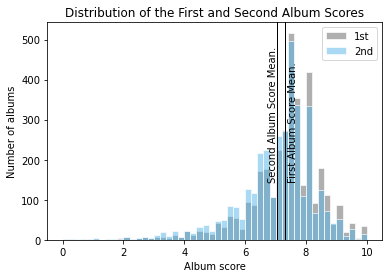

In [72]:
sns.histplot(first_score, bins = 50, color = clr_palette[7], edgecolor = 'white', label = '1st')
sns.histplot(second_score, bins = 50, color = clr_palette[-1], edgecolor = 'white', label = '2nd', alpha = 0.5)
plt.title('Distribution of the First and Second Album Scores')
plt.xlabel('Album score')
plt.ylabel('Number of albums')
plt.legend()

first_mean = first_score.mean()
second_mean = second_score.mean()
plt.axvline(first_mean, color = 'black', linewidth = 1)
plt.text(first_mean + 0.1, 150, 'First Album Score Mean.', rotation = 90, color = 'black')
plt.axvline(second_mean, color = 'black', linewidth = 1)
plt.text(second_mean - 0.3, 150, 'Second Album Score Mean.', rotation = 90, color = 'black')
plt.show()

* 4) Here we use `stats.ttest_ind` to implement independent t-test to determine whether the difference in means between the first and the second album in dataset is statistically significant. As can be seen from the printed result, the p-value is far less than $0.05$. So with $95$% certainty we should reject the null hypothesis and conclude that the means of the two are significantly different and the mean score of the second album set is lower than the mean score of the first album set.

In [57]:
statistic, pvalue = stats.ttest_ind(first_score, second_score, equal_var = True)
print(f'The t-stastic is equal to {statistic}, the p-value is {pvalue}')

The t-stastic is equal to 8.888721906458997, the p-value is 7.726379958317814e-19


* **Discussion:** Yes, these analyses suggest that the "second album syndrome" exists. Firstly, the mean score of the first album set is higher than the mean score of the second album set. Secondly, according to the histogram, the first album set has more scores with high value and fewer scores with low value than the second album set has. Thirdly, the t-test result shows that the mean score of the first album is significantly different from the mean score of the second album in the dataset. 

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


* 1）Here we create a new dataframe containing `score_diff`, `time_diff` and `did_style_change` columns. 

In [58]:
syndrome = pd.DataFrame(columns = ['score_diff', 'time_diff', 'did_style_change'])
syndrome['score_diff'] = second_album['score'] - first_album['score']
syndrome['time_diff'] = (second_album['releaseyear'] - first_album['releaseyear']) * 365

columns = ['key', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
columns_first = first_album[columns].columns + '_first'
columns_second = second_album[columns].columns + '_second'
first_second = pd.merge(first_album, second_album, on = 'artist', suffixes = ('_first', '_second'))

V = music_album.loc[music_album['album_number'] <= 1, columns].var()
syndrome['did_style_change'] = first_second.apply(lambda x: seuclidean(x[columns_first], x[columns_second], V), axis = 1)

threshold = syndrome.nlargest(int(0.2 * len(syndrome)), 'did_style_change').iloc[int(0.2 * len(syndrome)) - 1]['did_style_change']
syndrome['did_style_change'] = syndrome['did_style_change'].apply(lambda x: 1 if x >= threshold else 0)
syndrome.head()

,score_diff,time_diff,did_style_change
artist,,,
!!!,1.0,1825,0
(Sandy) Alex G,0.2,730,0
...And You Will Know Us by the Trail of Dead,-0.1,730,0
03 Greedo,0.0,0,0
13 & God,-2.1,2190,0


* 2) Here we declare the ordinary least squares linear regression model with `score_diff` as outcome and no input, fit the model and print the summary.

In [59]:
mod = smf.ols(formula = 'score_diff ~ 1', data = syndrome)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        20:09:12   Log-Likelihood:                -6195.2
No. Observations:                3561   AIC:                         1.239e+04
Df Residuals:                    3560   BIC:                         1.240e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2643      0.023    -11.440      0.0

* 3) **Discussion**: $R^2$ is a statistical measure of how well the regression line approximates the real data points. $R^2=-0.000$ infers that the intercept fits the expected mean value of the score. The intercept = $-0.2643 < 0$ meaning that the average difference between second and first album scores is negative, therefore, the first album is rated higher on average. This can be considered as another proof for "Second Album Syndrome" in Task 5: the second album's score is lower than that of the first album.

* 4) Here we add `time_diff` and `did_style_change`(categorical variable) to the regression model, fit the model and print the summary.

In [60]:
mod = smf.ols(formula = 'score_diff ~ time_diff + C(did_style_change)', data = syndrome)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     31.73
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.19e-14
Time:                        20:09:12   Log-Likelihood:                -6163.7
No. Observations:                3561   AIC:                         1.233e+04
Df Residuals:                    3558   BIC:                         1.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

* 5) **Discussion**:<br>
The p-value of intercept and `time_diff` is $0.000 < 0.05$, whereas the p-value of `did_style_change` is $0.24 > 0.05$. Therefore, only the `time_diff` is a significant predictor while `did_style_change` is not, in other words, we accept the null hypothesis that the `did_style_change` coefficient is equal to zero (this characteristic doesn't have an effect on the album score). Therefore, the **style change hypothesis** doesn't hold, if the band changes style after the first album, it doesn't have an impact on the listeners' evaluation of the band's music.<br><br>
The **time spent hypothesis** can be interpreted as "the smaller the time between the first and the second album releases, the worse second album would be rated by listeners". The `time_diff` coefficient is negative which means that an additive increase by 1 day in time difference between the second and first albums leads on average to decrease of score difference between the second and the first albums by $\approx -8.8 \cdot 10 ^{-5}$, therefore, the longer time is spent between the second and the first albums, the lower score the second album obtains. Consequently, the **time spent hypothesis** doesn't hold.<br><br>
The coefficients of `did_style_change` and `time_diff` don't provide evidence towards each of the aforementioned hypotheses.<br><br>
At the same time, they don't rule out other reasons that may cause the "second album syndrome effect". Some artists don't put a lot of effort when they are creating the second album because they are already famous and well-known for their first album. Another reason is that reviewers can have very high expectations for the second album after the successful release of the first one. Because of their subjective opinion, they put lower scores for the second album (or they can even do that on purpose, see Task 1.5). 

* 6) Let's we create a new column `time_diff_standardized` for further modelling.

In [70]:
syndrome['time_diff_standardized'] = (syndrome['time_diff'] - syndrome['time_diff'].mean()) / syndrome['time_diff'].std()
syndrome.head()

,score_diff,time_diff,did_style_change,time_diff_standardized
artist,,,,
!!!,1.0,1825,0,0.251110
(Sandy) Alex G,0.2,730,0,-0.286164
...And You Will Know Us by the Trail of Dead,-0.1,730,0,-0.286164
03 Greedo,0.0,0,0,-0.644347
13 & God,-2.1,2190,0,0.430202


* Here we replace `time_diff` with `time_diff_standardized` in the previous model, fit the model and print the summary.

In [62]:
mod = smf.ols(formula = 'score_diff ~ time_diff_standardized + C(did_style_change)', data = syndrome)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     31.73
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.19e-14
Time:                        20:09:16   Log-Likelihood:                -6163.7
No. Observations:                3561   AIC:                         1.233e+04
Df Residuals:                    3558   BIC:                         1.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

* 7) **Discussion**:<br>
The new interpretation of the coefficient associated with this new column `time_diff_standardized`: The `time_diff_standardized` coefficient is negative which means that an additive increase by 1 standard deviation in time difference between the second and first albums leads on average to decrease of score difference between the second and the first albums by  $-0.1798$ , therefore, the longer time is spent between the second and the first albums, the lower score the second album obtains. Also, the values of non_standardized `time_diff` have a very large scale compared to other variables, so that its regression coefficient has a small order of magnitude ($\sim 10^{-5}$) in comparison with other coefficients. After standardization of `time_diff`, the order of magnitude for all regression coefficients becomes the same ($\sim 10^{-1}$).

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


* 1) **Discussion**: If there was a very particular reason that negatively afflicted the second album more than all others, the bands should be able to correct the mistake and the mean score of the third album is supposed to increase. 

* 2) Let's calculate the mean and the standard error of the mean for the first, second, third and fourth albums and print the results.

In [63]:
third_score = music_album.loc[music_album.album_number == 2, 'score']
fourth_score = music_album.loc[music_album.album_number == 3, 'score']

print(f'The first album: mean score is {first_score.mean()}, the standard error for the mean score is {stats.sem(first_score)}')
print(f'The second album: mean score is {second_score.mean()}, the standard error for the mean score is {stats.sem(second_score)}')
print(f'The third album: mean score is {third_score.mean()}, the standard error for the mean score is {stats.sem(third_score)}')
print(f'The fourth album: mean score is {third_score.mean()}, the standard error for the mean score is {stats.sem(fourth_score)}')

The first album: mean score is 7.303229429935394, the standard error for the mean score is 0.020702013057327242
The second album: mean score is 7.038977815220425, the standard error for the mean score is 0.02133616828665977
The third album: mean score is 7.044125192406349, the standard error for the mean score is 0.027629699398426296
The fourth album: mean score is 7.044125192406349, the standard error for the mean score is 0.03612290649783797


* Here we plot the distribution of the first, second, third and fourth albums intuitively. 

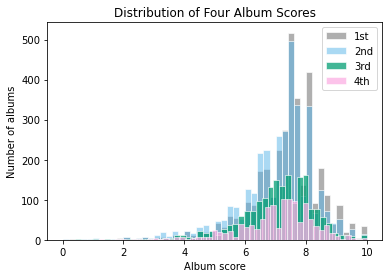

In [71]:
sns.histplot(first_score, bins = 50, color = clr_palette[7], edgecolor = 'white', label = '1st')
sns.histplot(second_score, bins = 50, color = clr_palette[-1], edgecolor = 'white',label = '2nd', alpha = 0.5)
sns.histplot(third_score, bins = 50, color = clr_palette[2], edgecolor = 'white',label = '3rd')
sns.histplot(fourth_score, bins = 50, color = clr_palette[6], edgecolor = 'white',label = '4th')

plt.title('Distribution of Four Album Scores')
plt.xlabel('Album score')
plt.ylabel('Number of albums')
plt.legend()
plt.show()

* Let's implement independent t-test between the second and the third albums and print the t-statistic with p-value results.

In [65]:
statistic_23, pvalue_23 = ttest_ind(second_score, third_score)
print(f'The second and the third album: t-statistic is equal to {statistic_23}, p-value is {pvalue_23}')

The second and the third album: t-statistic is equal to -0.14561434695359296, p-value is 0.8842311697757206


* 3) **Discussion**: We notice that the mean score of the third and the fourth album are similar to the second album which remains lower than that of the first album. Also, t-test result infers that there is no significant difference between the mean score of the second and the third album, which doesn't correspond to our hypothesis in Task 7.1. Therefore, this suggests that the Second Album Syndrome doesn't exist. In other words, there isn't anything special about the second album, just all albums after the first one are rated lower than the band's debut album.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

In [98]:
simulation = pd.DataFrame(columns = ['talent'])
simulation['talent'] = np.random.uniform(low = 2, high = 8, size = 1000)
simulation['album1'] = simulation['talent'].apply(lambda x: np.random.normal(x,1))
simulation = simulation[simulation['album1'] >= 6]
simulation['album2'] = simulation['talent'].apply(lambda x: np.random.normal(x,1))
simulation['album3'] = simulation['talent'].apply(lambda x: np.random.normal(x,1))
simulation.head()

,talent,album1,album2,album3
3,6.933065,7.465317,6.535420,8.328037
6,7.428008,6.936754,5.453065,6.729711
7,7.709074,7.864486,7.765176,7.506680
10,7.099916,6.996746,9.010217,7.797656
14,7.450034,8.037460,7.671184,7.588386


* Here we calulate the mean score and the standard error of the mean score of the three hypothetic albums and print the results. The mean score of the fisrt album is higher than the mean score of the second and the third album.

In [99]:
print(f'The first album: mean score is {simulation.album1.mean()}, the standard error for the mean score is {stats.sem(simulation.album1)}')
print(f'The second album: mean score is {simulation.album2.mean()}, the standard error for the mean score is {stats.sem(simulation.album2)}')
print(f'The third album: mean score is {simulation.album3.mean()}, the standard error for the mean score is {stats.sem(simulation.album3)}')

The first album: mean score is 7.286962001547276, the standard error for the mean score is 0.04558168848688654
The second album: mean score is 6.7261186548063225, the standard error for the mean score is 0.07047735044831399
The third album: mean score is 6.80941355480168, the standard error for the mean score is 0.07260320236496376


* Here we apply independent t-test method to determine whether the difference in means of the three albums is significant. According to the result, the difference between the first album and the second album as well as the difference between the first album and the third album is significant.

In [100]:
statistic_12, pvalue_12 = ttest_ind(simulation.album1, simulation.album2)
statistic_13, pvalue_13 = ttest_ind(simulation.album1, simulation.album3)
statistic_23, pvalue_23 = ttest_ind(simulation.album2, simulation.album3)

print(f'The first and second album: the statistic is {statistic_12}, the p-value is {pvalue_12}')
print(f'The first and third album: the statistic is {statistic_13}, the p-value is {pvalue_13}')
print(f'The second and third album: the statistic is {statistic_23}, the p-value is {pvalue_23}')

The first and second album: the statistic is 6.682036815071721, the p-value is 4.7112771924007315e-11
The first and third album: the statistic is 5.570649261192831, the p-value is 3.5833576861485625e-08
The second and third album: the statistic is -0.8231990661531561, the p-value is 0.41066661268344584


* Let's plot the distribution of three hypothetical album scores.

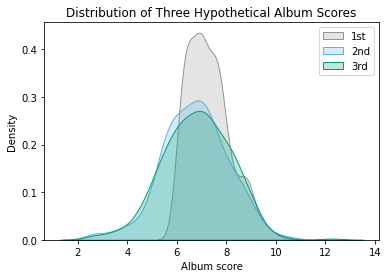

In [104]:
sns.kdeplot(simulation.album1, shade = True, color = clr_palette[7], label = '1st')
sns.kdeplot(simulation.album2, shade = True, color = clr_palette[-1], label = '2nd')
sns.kdeplot(simulation.album3, shade = True, color = clr_palette[2], label = '3rd')

plt.xlabel('Album score')
plt.ylabel('Density')
plt.title('Distribution of Three Hypothetical Album Scores')
plt.legend()
plt.show()

**Discussion**:
* In the simulation, the average score of the first album is significantly higher than the second and the third albums according to the t-test, which corresponds to the scores we obtained in Task 7.2. 
* The difference between the first and the second/third album is generated in the third step: we discarded the bands whose albums received a score smaller than 6. In theory, if with enough albums, the mean score of all the albums should be equal to the intrinsic talent of the band. However, if with only one album, the album score could be either higher or lower. When we discarded all bands whose first album received a score smaller than 6, in the meantime, we kept some bands whose talent score was lower than 6. For these bands, they outdid themselves for their first albums. When we created two additional albums for these bands, the mean score of these two albums follows the normal distribution whose mean matches the talent score lower than 6, thus causing the lower mean score of the second and the third album.
* In real life, when the first album of a band received negative feedback, some of the band tend to be discouraged and might stop creating new albums, even though they might be talented and could get a huge success later. And when the first album of a band receives positive feedback, they tend to keep creating new albums, including those bands whose talent scores are not that high. When those bands create a new album, their 'true talent' shows, thus they receive a lower score.